In [1]:
### importing Dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading Dataset

transaction_data = pd.read_csv(r'C:\Users\BHAVESH\IGnosis Tech Task\transaction_data.csv')
purchase_data = pd.read_csv(r'C:\Users\BHAVESH\IGnosis Tech Task\purchase_behaviour.csv')

In [3]:
# Exploring datasets
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
## Checking if there is null values in our dataset
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [6]:
purchase_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [8]:
## merging purchase data and transaction data on='LYLTY_CARD_NBR'

data = pd.merge(purchase_data,transaction_data,on='LYLTY_CARD_NBR')
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [9]:
## Shape of our merged data

print('Shape of Our data:', data.shape)

Shape of Our data: (264836, 10)


In [10]:
## retreiving statitcal info about data 
data.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648360e+05,264836.000000,264836.00000,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,1.355495e+05,43464.036260,135.08011,1.351583e+05,56.583157,1.907309,7.304200
std,8.057998e+04,105.389282,76.78418,7.813303e+04,32.826638,0.643654,3.083226
min,1.000000e+03,43282.000000,1.00000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,43373.000000,70.00000,6.760150e+04,28.000000,2.000000,5.400000
50%,1.303575e+05,43464.000000,130.00000,1.351375e+05,56.000000,2.000000,7.400000
75%,2.030942e+05,43555.000000,203.00000,2.027012e+05,85.000000,2.000000,9.200000
max,2.373711e+06,43646.000000,272.00000,2.415841e+06,114.000000,200.000000,650.000000


In [12]:
## Extracting Features from data

data = data[['LYLTY_CARD_NBR','LIFESTAGE','PREMIUM_CUSTOMER','TXN_ID','PROD_NBR','PROD_NAME','PROD_QTY','TOT_SALES']]
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,5,96,WW Original Stacked Chips 160g,1,1.9


In [13]:
data['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: LIFESTAGE, dtype: int64

In [14]:
data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    101988
Budget         93157
Premium        69691
Name: PREMIUM_CUSTOMER, dtype: int64

In [15]:
mainstream_customer = data[(data['PREMIUM_CUSTOMER'] == 'Mainstream') & (data['TOT_SALES'])]
budget_customer = data[(data['PREMIUM_CUSTOMER'] == 'Budget') & (data['TOT_SALES'])]
premium_customer = data[(data['PREMIUM_CUSTOMER'] == 'Premium') & (data['TOT_SALES'])]

#### Profitable customers

In [35]:
## Profitable customers characteristics
profitable_customers = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
profitable_customers = profitable_customers.sort_values(by='TOT_SALES', ascending=False)
profitable_customers.iloc[0:10]

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,168363.25
19,YOUNG SINGLES/COUPLES,Mainstream,157621.60
13,RETIREES,Mainstream,155677.05
15,YOUNG FAMILIES,Budget,139345.85
9,OLDER SINGLES/COUPLES,Budget,136769.80
10,OLDER SINGLES/COUPLES,Mainstream,133393.80
11,OLDER SINGLES/COUPLES,Premium,132263.15
12,RETIREES,Budget,113147.80
7,OLDER FAMILIES,Mainstream,103445.55
14,RETIREES,Premium,97646.05


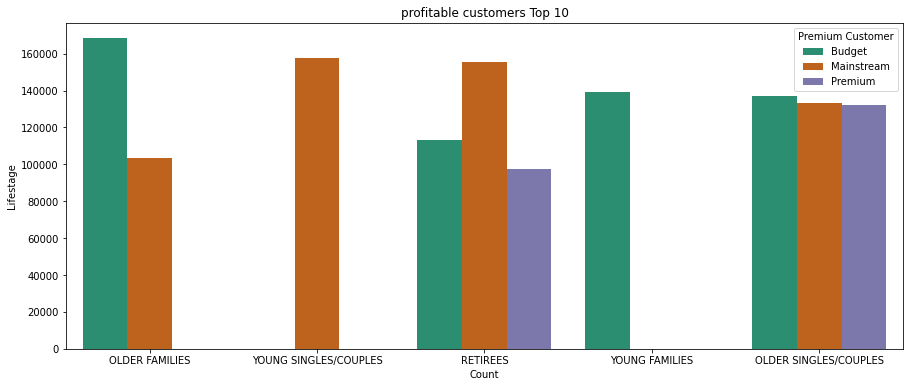

In [40]:
plt.figure(figsize=(15, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=profitable_customers.iloc[0:10], palette='Dark2')
plt.title('profitable customers Top 10')
plt.xlabel('Count')
plt.ylabel('Lifestage')
plt.legend(title='Premium Customer')
plt.show()


#### Profitable product

In [47]:
## Groupby data by product name and calculate total sales 
profitable_product = data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
profitable_product = profitable_product.sort_values(by='TOT_SALES',ascending=False)


In [48]:
profitable_product.head()

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
33,Kettle Mozzarella Basil & Pesto 175g,34457.4
76,Smiths Crinkle Original 330g,34302.6


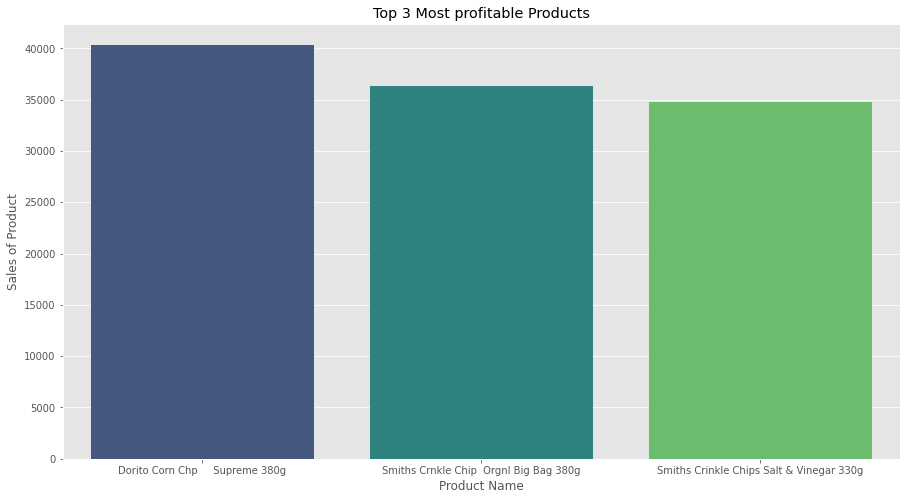

In [62]:
top_3 = profitable_product.head(3)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
sns.barplot(x='PROD_NAME',y='TOT_SALES',data=top_3,palette='viridis')
plt.title('Top 3 Most profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Sales of Product')
plt.show()

#### Loyal Customers

In [50]:
# Group by customer and calculate total sales and number of transactions
customer_loyalty = data.groupby('LYLTY_CARD_NBR').agg(
    total_sales=('TOT_SALES', 'sum'),
    total_transactions=('TXN_ID', 'nunique')
).reset_index()

# Define loyal customers 
loyal_customers = customer_loyalty[customer_loyalty['total_sales'] > customer_loyalty['total_sales'].quantile(0.9)]

In [51]:
customer_loyalty.head()

,LYLTY_CARD_NBR,total_sales,total_transactions
0,1000,6.0,1
1,1002,2.7,1
2,1003,6.6,2
3,1004,1.9,1
4,1005,2.8,1


In [54]:
loyal_customers = loyal_customers.sort_values(by='total_transactions',ascending=False)
loyal_customers.head(5)

,LYLTY_CARD_NBR,total_sales,total_transactions
42813,162039,126.8,18
3686,13138,109.0,17
60925,230078,138.6,17
34943,128178,99.7,16
25958,94185,122.8,16


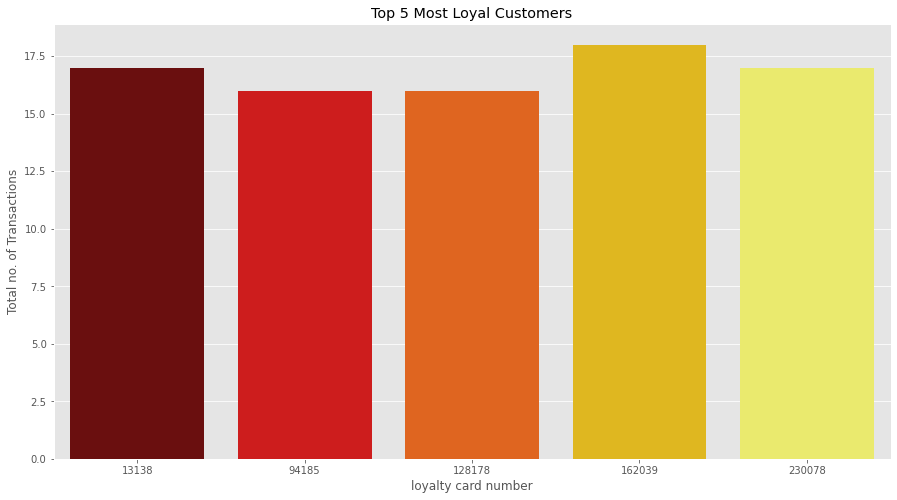

In [69]:
top_5 = loyal_customers.head(5)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
sns.barplot(x='LYLTY_CARD_NBR',y='total_transactions',data=top_5,palette='hot')
plt.title('Top 5 Most Loyal Customers')
plt.xlabel('loyalty card number')
plt.ylabel('Total no. of Transactions')
plt.show()

In [61]:
loyal_customer_characteristics = data[data['LYLTY_CARD_NBR'].isin(loyal_customers['LYLTY_CARD_NBR'])]

# Analyze LIFESTAGE and PREMIUM_CUSTOMER segments
loyal_customer_segments = loyal_customer_characteristics.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='count')
loyal_customer_segments.head()

,LIFESTAGE,PREMIUM_CUSTOMER,count
0,MIDAGE SINGLES/COUPLES,Budget,624
1,MIDAGE SINGLES/COUPLES,Mainstream,2311
2,MIDAGE SINGLES/COUPLES,Premium,1422
3,NEW FAMILIES,Budget,69
4,NEW FAMILIES,Mainstream,50


In [59]:
loyal_customer_segments = loyal_customer_segments.sort_values(by='count', ascending=False)

print("Characteristics of Loyal Customers:")
print(loyal_customer_segments)


Characteristics of Loyal Customers:
                 LIFESTAGE PREMIUM_CUSTOMER  count
6           OLDER FAMILIES           Budget  10687
15          YOUNG FAMILIES           Budget   8744
7           OLDER FAMILIES       Mainstream   6888
16          YOUNG FAMILIES       Mainstream   5244
17          YOUNG FAMILIES          Premium   5146
8           OLDER FAMILIES          Premium   5079
9    OLDER SINGLES/COUPLES           Budget   3022
10   OLDER SINGLES/COUPLES       Mainstream   2877
11   OLDER SINGLES/COUPLES          Premium   2799
19   YOUNG SINGLES/COUPLES       Mainstream   2637
1   MIDAGE SINGLES/COUPLES       Mainstream   2311
13                RETIREES       Mainstream   2147
12                RETIREES           Budget   1621
2   MIDAGE SINGLES/COUPLES          Premium   1422
14                RETIREES          Premium   1266
18   YOUNG SINGLES/COUPLES           Budget    900
0   MIDAGE SINGLES/COUPLES           Budget    624
20   YOUNG SINGLES/COUPLES          Premium   